In [42]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
%matplotlib inline


In [43]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多
X = data.data
y = data.target

## 建模，查看其他属性

In [44]:
Xtrain, Xtest,Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [45]:
reg = XGBR(n_estimators=100).fit(Xtrain, Ytrain)
reg.predict(Xtest)

[20:15:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 8.165384 , 21.919355 , 29.843645 , 11.874415 ,  8.833874 ,
       20.698246 , 15.456877 , 15.544203 , 15.273806 , 13.444421 ,
       22.130966 , 35.072395 , 21.383947 , 27.477697 , 20.449163 ,
       10.434615 , 19.13851  , 24.973454 , 23.284975 , 23.22411  ,
       17.86431  , 17.218367 , 25.284815 , 20.962675 , 20.506361 ,
       16.18782  , 21.71437  , 31.687273 , 22.739857 , 15.976351 ,
       37.61867  , 20.701538 , 21.191647 , 23.53703  , 23.374733 ,
       24.682228 , 16.27922  , 24.404453 , 16.918646 , 34.06889  ,
       18.060398 , 21.352114 , 37.74781  , 17.90909  , 14.035863 ,
       28.243176 , 46.44803  , 14.748789 , 10.719417 , 35.26486  ,
       25.46181  , 21.976503 , 20.583235 , 49.3701   , 26.799538 ,
       26.286161 , 17.937538 , 20.566235 , 16.813719 , 18.816374 ,
       14.940857 , 22.213655 , 19.239632 , 30.246548 , 27.522081 ,
       18.951006 , 19.352182 , 15.716684 , 22.732222 , 19.14629  ,
       29.943521 , 43.593327 , 29.910528 , 22.987352 , 20.6698

In [46]:
reg.score(Xtest, Ytest)

0.9197580267581366

In [47]:
MSE(Ytest, reg.predict(Xtest))

7.466827353555599

In [48]:
# 树模型的有事之一， 可以查看模型的重要性分数， 可以使用嵌入法进行特征选择
reg.feature_importances_

array([0.02474326, 0.00233919, 0.00895177, 0.01757721, 0.04847462,
       0.25909728, 0.0120366 , 0.0429231 , 0.01358514, 0.02558688,
       0.04455473, 0.01763431, 0.48249587], dtype=float32)

##   使用交叉验证， 与线性回归 和 随机森林进行对比

In [49]:
reg = XGBR(n_estimators=100)  # 先进行实例化
CVS(reg, Xtrain, Ytrain,cv=5).mean()

[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8017863029875325

In [50]:
# 查看一下 sklearn 中虽所有的模型评估指标 
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [51]:
#这里应该返回什么模型评估指标，还记得么？
#严谨的交叉验证与不严谨的交叉验证之间的讨论：训练集or全数据？


CVS(reg,Xtrain, Ytrain,cv=5,scoring="neg_mean_squared_error").mean()

[20:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-16.041115480238048

In [52]:
# 使用随机森林和 线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr, Xtrain, Ytrain, cv=5).mean()

0.7925446657009158

In [53]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.352400852193156

In [54]:
# 线性回归
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()


-25.3495074936485

In [55]:
#  开启参数， silent:  在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的进度
reg = XGBR(n_estimators=10, silent=False)
CVS(reg,Xtrain,Ytrain,cv=5, scoring="neg_mean_squared_error").mean()

[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-92.67865836936579

##  绘制以训练样本数为横坐标的学习曲线的函数

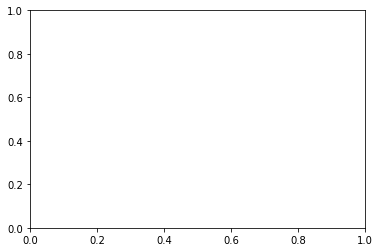

In [60]:
%matplotlib inline
def plot_learning_curve(estimator,title, X, y,
    ax=None, #选择子图
    ylim=None, #设置纵坐标的取值范围
    cv=None, #交叉验证
    n_jobs=None #设定索要使用的线程
    ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
            ,shuffle=True
            ,cv=cv
            # ,random_state=420
            ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
        ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
        ax.grid() #绘制网格，不是必须
        ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
        ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
        ax.legend(loc="best")
    return ax


cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420,silent=True)
            ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()
#多次运行，观察结果，这是怎么造成的？
#在现在的状况下，如何看数据的潜力？还能调上去么？

660 0.8046775284172915


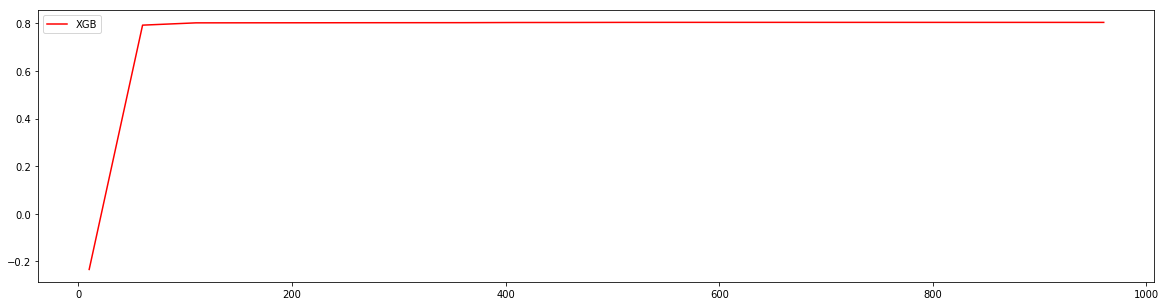

In [63]:
#=====【TIME WARNING：25 seconds】=====#
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,silent=True)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

650 0.80476050359201 0.01053673846018678
50 0.7857724708830981
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


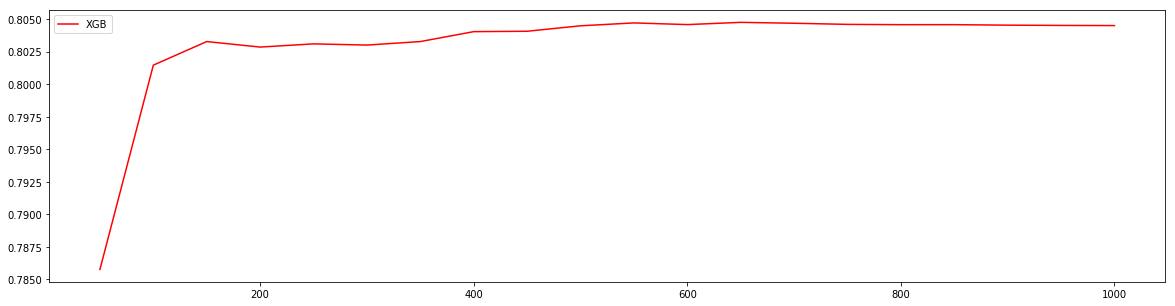

In [66]:
#======【TIME WARNING: 20s】=======#
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,silent=True)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))])
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


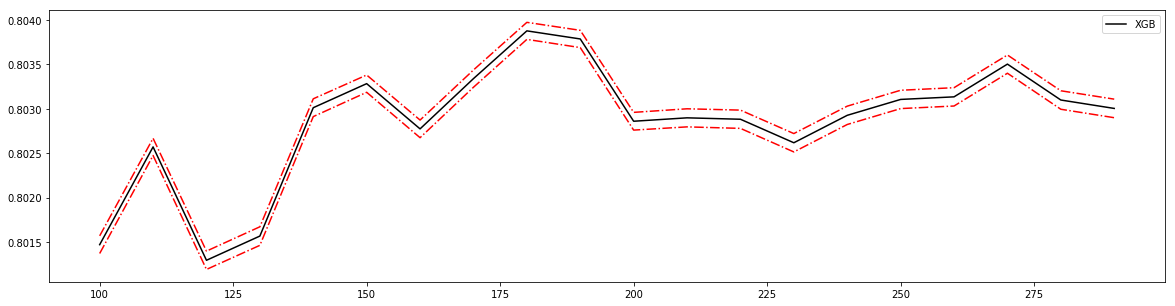

In [72]:
#  细化学习曲线，找出最佳  n_estimators 
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420,silent=True)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2 + cvresult.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")

# 添加方差线
plt.plot(axisx,rs+var,c="red",linestyle="-.")
plt.plot(axisx, rs-var, c="red",linestyle="-.")
plt.legend()
plt.show()


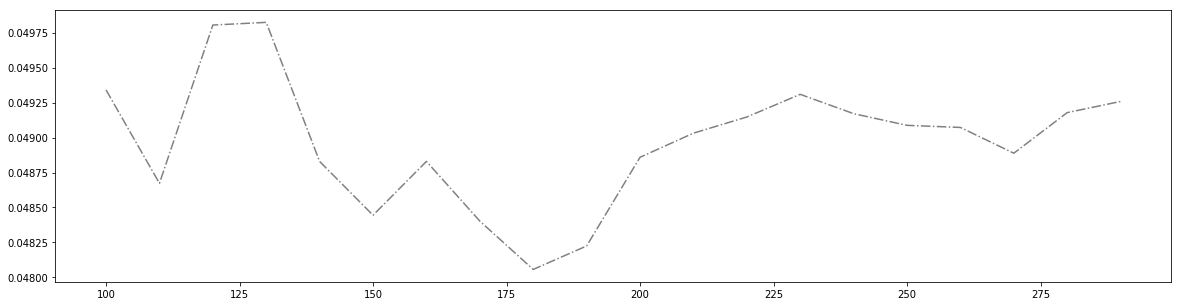

In [73]:
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

##  检测 模型结果··



In [76]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

[20:46:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9197580267581366
1.1210012435913086
[20:46:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9208745746309475
0.413893461227417
[20:46:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9231068620728082
0.10870814323425293
